# K Cluster Technique
### in K mean cluster always find elbow where you can grab K

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")

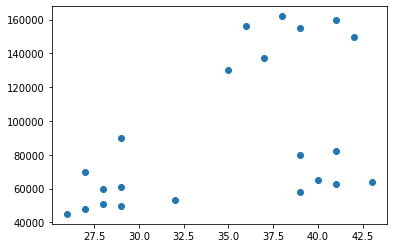

In [3]:
plt.scatter(df['Age'],df["Income($)"])

In [4]:
km = KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df[["Age","Income($)"]])

In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


Text(0, 0.5, 'Income($)')

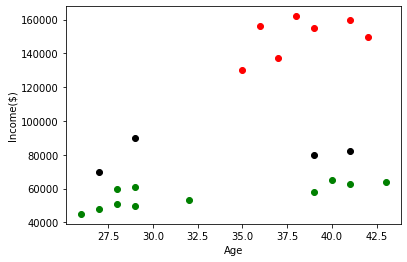

In [7]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age,df1["Income($)"],color="green")
plt.scatter(df2.Age,df2["Income($)"],color="red")
plt.scatter(df3.Age,df3["Income($)"],color="black")

#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")

plt.xlabel("Age")
plt.ylabel("Income($)")
#plt.legend([df1,df2,df3],["income($)","income($)","income($)"])

## MinMax Scaler applied for the Scalling Income -> Age

In [8]:
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
scaler.fit(df[["Age"]])
df["Income($)"] = scaler.fit_transform(df[["Income($)"]])
df["Age"] = scaler.fit_transform(df[["Age"]])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [9]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [10]:
df["cluster"] = y_predicted

Text(0, 0.5, 'Income($)')

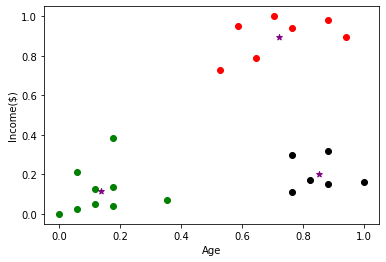

In [11]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age,df1["Income($)"],color="green")
plt.scatter(df2.Age,df2["Income($)"],color="red")
plt.scatter(df3.Age,df3["Income($)"],color="black")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")

plt.xlabel("Age")
plt.ylabel("Income($)")
#plt.legend([df1,df2,df3],["income($)","income($)","income($)"])

## Finding K by Elbow Technique

In [12]:
k_rng = range(1,10)
sse = []
for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

In [13]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.22020960864009395,
 0.1685851223602976,
 0.13265419827245162,
 0.10497488680620906]

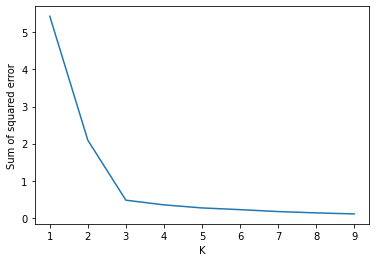

In [14]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng,sse)